# 🛠 05. Transfer Learning in TensorFlow Part 2: Fine-tuning Exercise Solutions 

# Questions 

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.

2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.



In [1]:
# <------> Solutions starting <------>

# Getting the data and setting things up (Food vision 10% data) 

In [116]:
# importing required libraries 
import tensorflow as tf 
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# getting the data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-07-06 15:54:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   167MB/s    in 1.0s    

2021-07-06 15:54:16 (167 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# extracting data 
!unzip 10_food_classes_10_percent.zip

Archive:  10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_classes_10_per

In [67]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [68]:
# Getting our train and test directory 
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'


train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    label_mode = 'categorical',
    image_size = (224,224)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir, 
    label_mode = 'categorical',
    image_size = (224,224)
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.



## 1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.

In [80]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

In [81]:
base_model.trainable = False # setting the base model layers as trainable to fine tune the model 

In [82]:
# taking inputs 
inputs = tf.keras.layers.Input(shape = (224,224,3)) # here 3 is no of color channels 
x = base_model(inputs)

# passing inputs through GlobalMaxPool2D for maxpooling and reducing the dimensions 
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# making the output layer 
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

# putting the model together with tf.keras.Model 
model = tf.keras.Model(inputs, outputs)

In [83]:
# model's summary 
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [84]:
# compiling the model 
model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                     metrics=['accuracy'])


In [86]:
# Fitting the model on 8 epochs and saving weights using ModelCheckpointCallback
history = model.fit(train_data,
                    epochs=8,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks = [callbacks.ModelCheckpoint('./weights' , save_weights_only= True)]
                    )

Epoch 1/8
24/24 [==============================] - 11s 443ms/step - loss: 0.2912 - accuracy: 0.9080 - val_loss: 0.4918 - val_accuracy: 0.8328
Epoch 2/8
24/24 [==============================] - 11s 445ms/step - loss: 0.1692 - accuracy: 0.9547 - val_loss: 0.4853 - val_accuracy: 0.8388
Epoch 3/8
24/24 [==============================] - 11s 448ms/step - loss: 0.1159 - accuracy: 0.9773 - val_loss: 0.4591 - val_accuracy: 0.8472
Epoch 4/8
24/24 [==============================] - 11s 445ms/step - loss: 0.0709 - accuracy: 0.9933 - val_loss: 0.4613 - val_accuracy: 0.8472
Epoch 5/8
24/24 [==============================] - 11s 445ms/step - loss: 0.0669 - accuracy: 0.9893 - val_loss: 0.4835 - val_accuracy: 0.8492
Epoch 6/8
24/24 [==============================] - 11s 442ms/step - loss: 0.0456 - accuracy: 0.9947 - val_loss: 0.4494 - val_accuracy: 0.8568
Epoch 7/8
24/24 [==============================] - 11s 438ms/step - loss: 0.0383 - accuracy: 0.9987 - val_loss: 0.4673 - val_accuracy: 0.8492
Epoch 

## 2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [87]:
# checking the model 
for no,layer in enumerate(model.layers):
  print(no,layer.name, layer.trainable)

0 input_16 True
1 efficientnetb0 False
2 global_average_pooling2d_3 True
3 dense_8 True


In [88]:
base_model.trainable = True
# unfreezing last 20 layers
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [89]:
for layer in base_model.layers:
  print(layer,layer.name, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0e489bbc90> input_15 False
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f0e489bb750> rescaling_6 False
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f0e489bb650> normalization_6 False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f0db576f650> stem_conv_pad False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0e489d8d90> stem_conv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f0db8970990> stem_bn False
<tensorflow.python.keras.layers.core.Activation object at 0x7f0e489df190> stem_activation False
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f0e489eb6d0> block1a_dwconv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f0e489eef90> block1a_bn False
<tensorflow.python.keras.layers.core.

In [90]:
# compiling model for fine tuning 
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

In [91]:
model.fit(train_data, 
          epochs = 10 ,
          steps_per_epoch=len(train_data),
          validation_data = test_data , 
          validation_steps = len(test_data),
          initial_epoch =history.epoch[-1])

Epoch 8/10
24/24 [==============================] - 17s 491ms/step - loss: 0.3744 - accuracy: 0.8813 - val_loss: 0.4561 - val_accuracy: 0.8580
Epoch 9/10
24/24 [==============================] - 11s 447ms/step - loss: 0.1583 - accuracy: 0.9747 - val_loss: 0.4588 - val_accuracy: 0.8524
Epoch 10/10
24/24 [==============================] - 13s 546ms/step - loss: 0.1037 - accuracy: 0.9880 - val_loss: 0.4621 - val_accuracy: 0.8548


## 3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [92]:
# loading the weights we've saved before in ./weights 
model.load_weights('./weights')

In [93]:
# checking the model 
for no,layer in enumerate(model.layers):
  print(no,layer.name, layer.trainable)

0 input_16 True
1 efficientnetb0 True
2 global_average_pooling2d_3 True
3 dense_8 True


In [94]:
base_model.trainable = True
# unfreezing last 30 layers
for layer in base_model.layers[:-30]:
  layer.trainable = False

In [95]:
for layer in base_model.layers:
  print(layer,layer.name, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0e489bbc90> input_15 False
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f0e489bb750> rescaling_6 False
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f0e489bb650> normalization_6 False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f0db576f650> stem_conv_pad False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0e489d8d90> stem_conv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f0db8970990> stem_bn False
<tensorflow.python.keras.layers.core.Activation object at 0x7f0e489df190> stem_activation False
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f0e489eb6d0> block1a_dwconv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f0e489eef90> block1a_bn False
<tensorflow.python.keras.layers.core.

In [96]:
# compiling model for fine tuning 
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

In [97]:
model.fit(train_data, 
          epochs = 10 ,
          steps_per_epoch=len(train_data),
          validation_data = test_data , 
          validation_steps = len(test_data),
          initial_epoch =history.epoch[-1])

Epoch 8/10
24/24 [==============================] - 17s 489ms/step - loss: 0.4629 - accuracy: 0.8560 - val_loss: 0.4606 - val_accuracy: 0.8496
Epoch 9/10
24/24 [==============================] - 11s 442ms/step - loss: 0.1824 - accuracy: 0.9640 - val_loss: 0.4685 - val_accuracy: 0.8464
Epoch 10/10
24/24 [==============================] - 11s 444ms/step - loss: 0.1066 - accuracy: 0.9867 - val_loss: 0.4756 - val_accuracy: 0.8396


you may have noticed that compared to learning on the 20 layers 30 layers unfreezing didn't brought any significant change.


## 4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [180]:
def visualizer(model, dataset_dir):
  """
  visualizes an image from dataset provided and make prediction with the help of model which you have given 
  """
  dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dataset_dir,
    label_mode = 'categorical',
    image_size = (224,224)
  )
  classes = dataset.class_names

  sample = dataset.take(1)
  plt.figure(figsize=(25,20))
  ind =0
  for image,label in list(sample.unbatch())[:5]:
    plt.subplot(1,5,ind+1)
    plt.imshow(image/255.)
    orig = classes[np.argmax(label)]
    pred=classes[np.argmax(tf.squeeze(model.predict(tf.expand_dims(image/255.,axis = 0))))]
    plt.xlabel(f'true:{orig} predicted:{pred}',fontdict={'color':'green' if orig==pred else 'red'})
    ind+=1
    


Found 2500 files belonging to 10 classes.


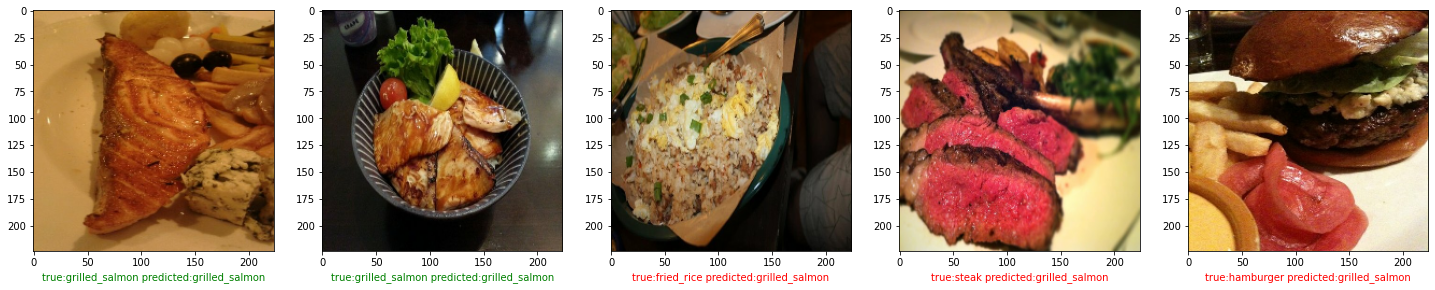

In [182]:
visualizer(model,test_dir)